# Show the correlations using the location informations and the prices.

In [2]:
import pandas as pd

try:
    Tokyo_Location = pd.read_csv('/workspaces/Coworking/src/results/Tokyo/LocattionCowroking.csv')
    print('File correct exported!')
except Exception as e:
    print('Fallo inesperado')
    
Tokyo_Location


File correct exported!


,name,Neightboorhood,Population,Median Household Income,People Between 18 and 64,Transport,Day Pass,Month Pass
0,Basis Point Shinbashi,Shinbashi,100000,6500000,65000,4,2500,40000
1,Pasela Co-work Higashishinjuku,Higashishinjuku,25000,4500000,16250,3,2000,30000
2,AWS Startup Loft Tokyo,Akasaka,50000,7000000,32500,3,3000,45000
3,LULL TECH BEACH shibuya coworking space,Shibuya,230000,5500000,149500,3,3000,40000
4,【法人登記可】コワーキングスペースfactoria nishiogi,Nishiogi,80000,4200000,52000,3,2000,30000


In [4]:
Tokyo_Location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      5 non-null      object
 1   Neightboorhood            5 non-null      object
 2   Population                5 non-null      int64 
 3   Median Household Income   5 non-null      int64 
 4   People Between 18 and 64  5 non-null      int64 
 5   Transport                 5 non-null      int64 
 6   Day Pass                  5 non-null      int64 
 7   Month Pass                5 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 452.0+ bytes


In [5]:
Tokyo_Location.isnull().sum()

name                        0
Neightboorhood              0
Population                  0
Median Household Income     0
People Between 18 and 64    0
Transport                   0
Day Pass                    0
Month Pass                  0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns you want to scale
numerical_columns = ['Population', 'People Between 18 and 64',
                     'Median Household Income', 'Transport', 'Month Pass', 'Day Pass']

# Apply the scaling to these columns
Tokyo_Location[numerical_columns] = scaler.fit_transform(Tokyo_Location[numerical_columns])

# Check the result
Tokyo_Location.head()


,name,Neightboorhood,Population,Median Household Income,People Between 18 and 64,Transport,Day Pass,Month Pass
0,Basis Point Shinbashi,Shinbashi,0.042108,0.881365,0.042108,2.0,0.000000,0.500000
1,Pasela Co-work Higashishinjuku,Higashishinjuku,-1.010582,-0.954812,-1.010582,-0.5,-1.118034,-1.166667
2,AWS Startup Loft Tokyo,Akasaka,-0.659686,1.340409,-0.659686,-0.5,1.118034,1.333333
3,LULL TECH BEACH shibuya coworking space,Shibuya,1.866770,-0.036724,1.866770,-0.5,1.118034,0.500000
4,【法人登記可】コワーキングスペースfactoria nishiogi,Nishiogi,-0.238610,-1.230238,-0.238610,-0.5,-1.118034,-1.166667


## Visualizations.

### Heatmap

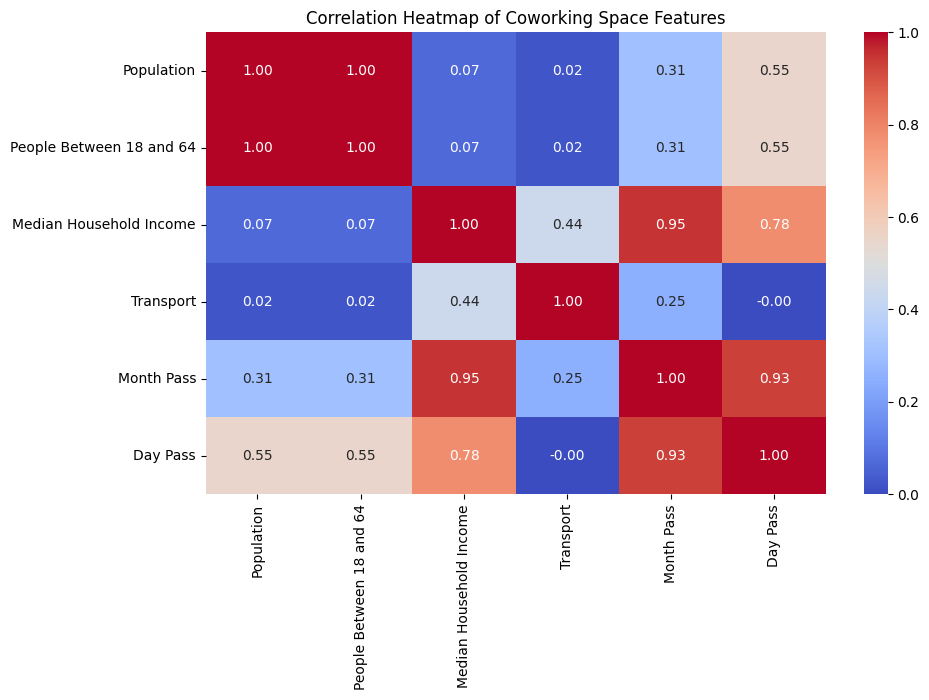

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = Tokyo_Location[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Coworking Space Features')
plt.show()


###

 - More income, more expensive the month pass

The month pass is high correlated with the median household income, that means that higher the income more expensive is the month pass.